**라이브러리 불러오기**

In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
# df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
# df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

# df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

# 데이터 확인하기

In [3]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Null data check

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Target Label 확인하기

Text(0, 0.5, '')

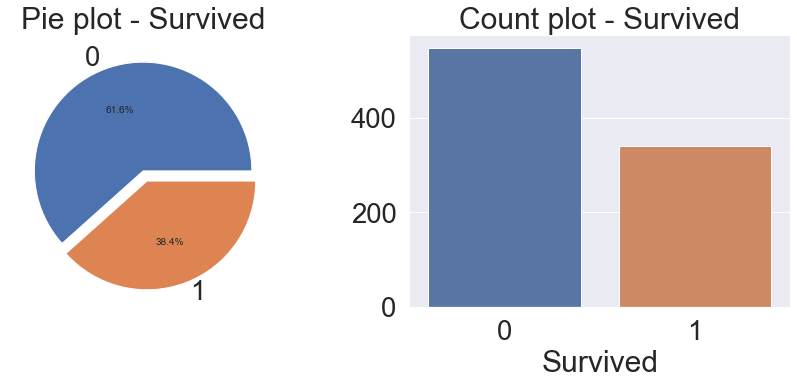

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
ax[1].set_ylabel('')

# Exploratory Data Analysis

## Pclass

In [150]:
# num of people in Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [151]:
# num of people who survived in Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


<AxesSubplot:xlabel='Pclass'>

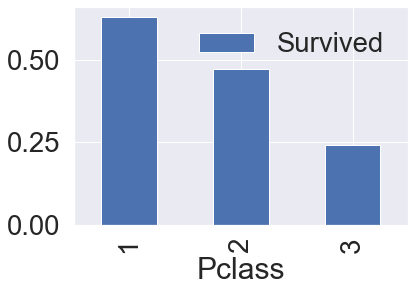

In [152]:
# survival rate per class
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

Text(0.5, 1.0, 'Pclass: Survived vs Dead')

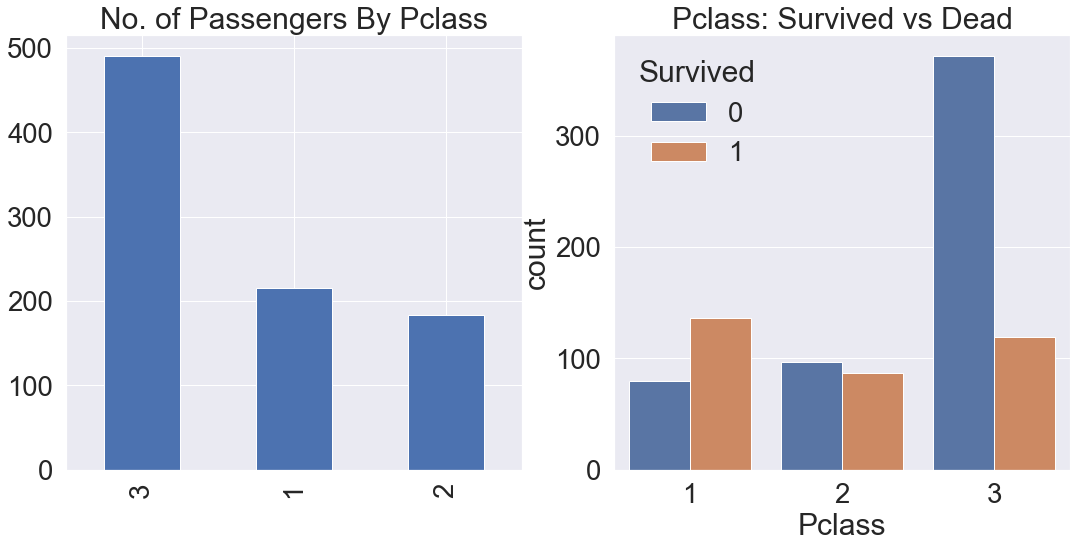

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('No. of Passengers By Pclass')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

## Sex

Text(0.5, 1.0, 'Sex: survived vs dead')

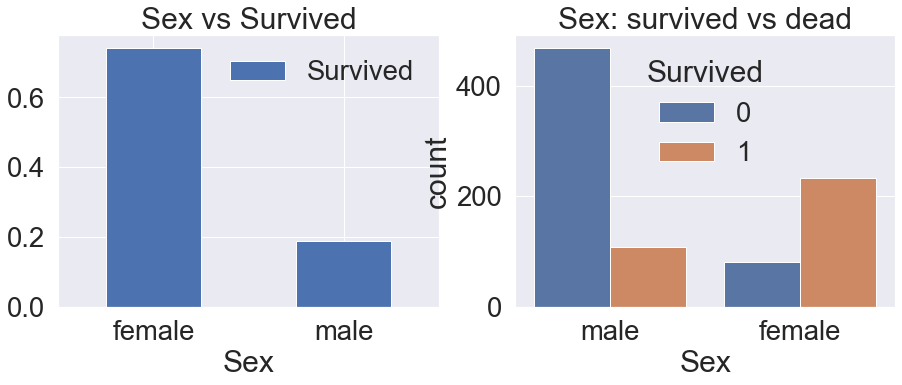

In [154]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0], rot=0)
ax[0].set_title('Sex vs Survived')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: survived vs dead')

## Both Sex and Pclass

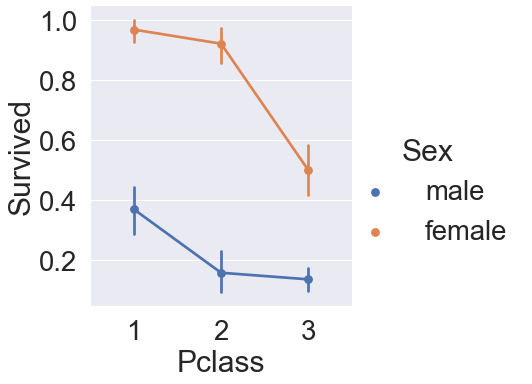

In [155]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

## Age

In [156]:
print('제일 나이가 많은 승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('승객 나이 평균 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이가 많은 승객 : 80.0 Years
제일 어린 승객 : 0.4 Years
승객 나이 평균 : 29.7 Years


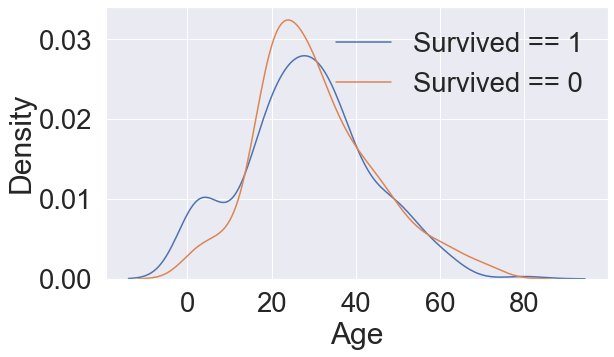

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

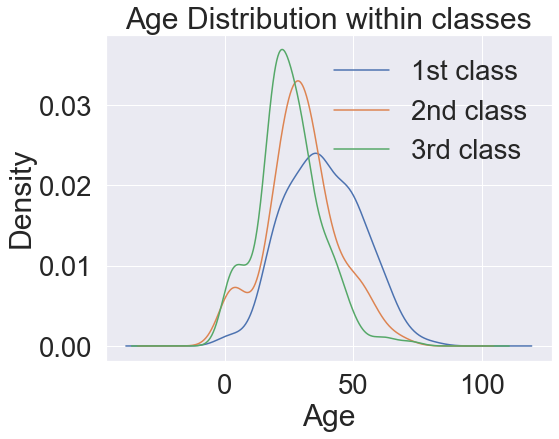

In [158]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

Text(0.5, 0, 'Range of Age(0~x)')

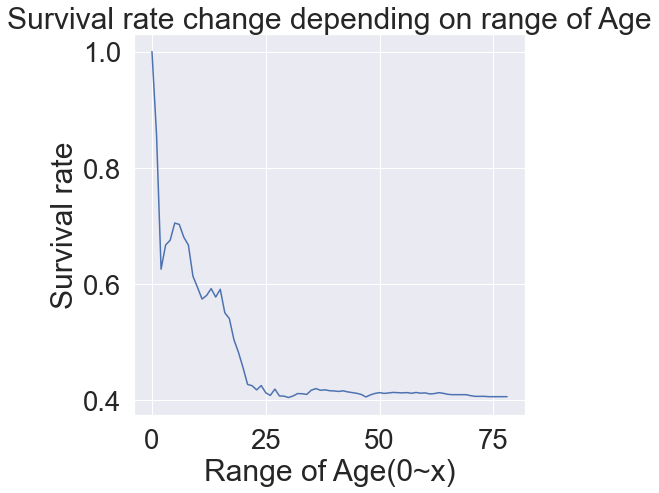

In [159]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

## Pclass, Sex, Age 

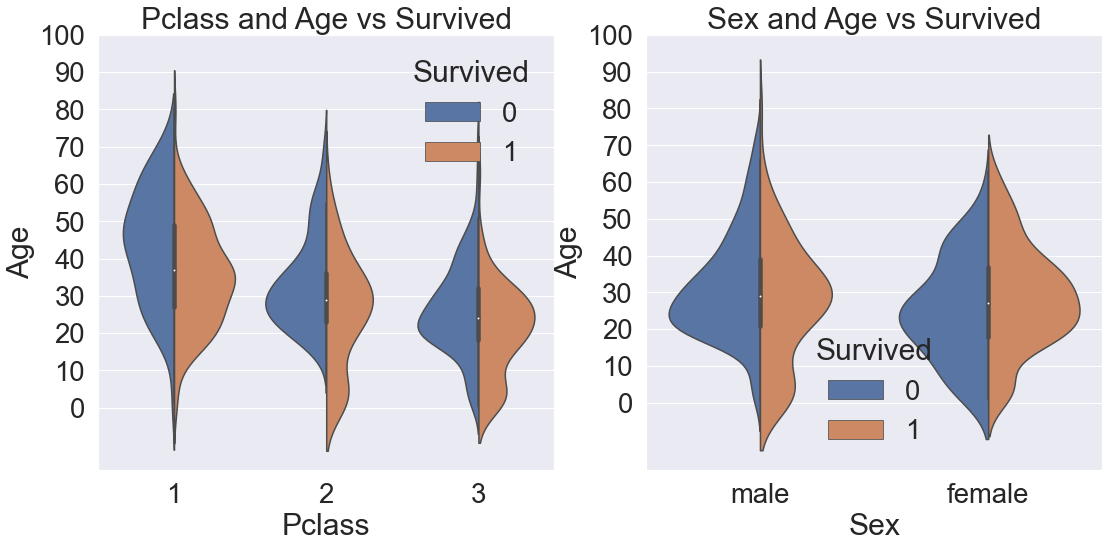

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', split=True, data=df_train, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', split=True, data=df_train, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## Embarked

<AxesSubplot:xlabel='Embarked'>

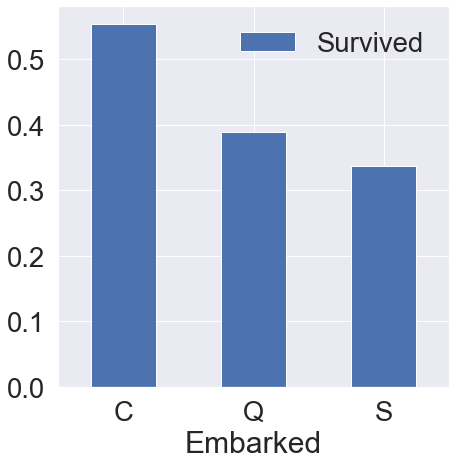

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(
    by='Survived', ascending=False).plot.bar(ax=ax, rot=0)

Text(0.5, 1.0, '(4) Embarked vs Pclass')

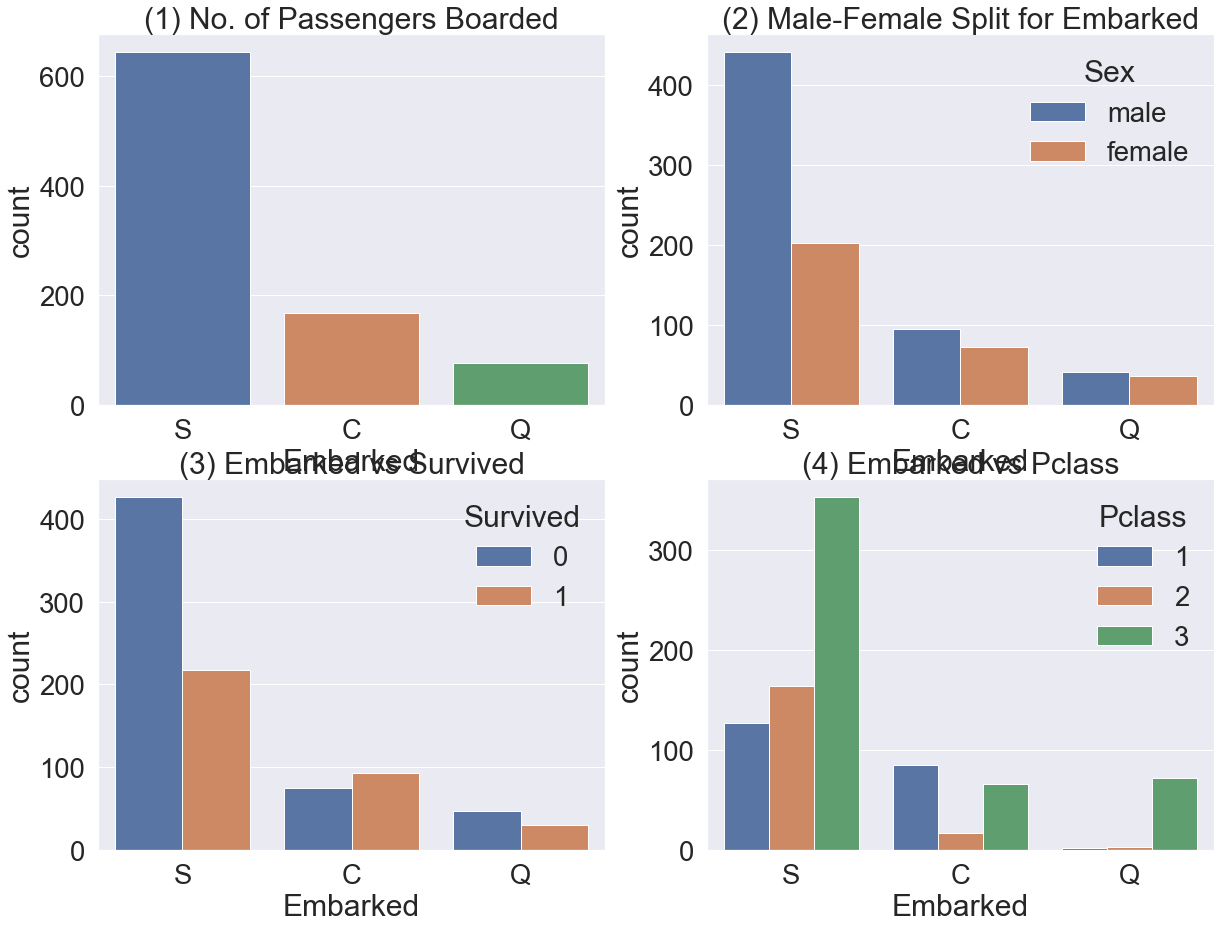

In [162]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

## Family - SibSp + Parch

In [163]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [164]:
print('Maximum size of Family:', df_train['FamilySize'].max())
print('Minimum size of Family:', df_train['FamilySize'].min())
print('Mean size of Family:', round(df_train['FamilySize'].mean()))

Maximum size of Family: 11
Minimum size of Family: 1
Mean size of Family: 2


Text(0.5, 1.0, '(3) Survived rate depending on FamilySize')

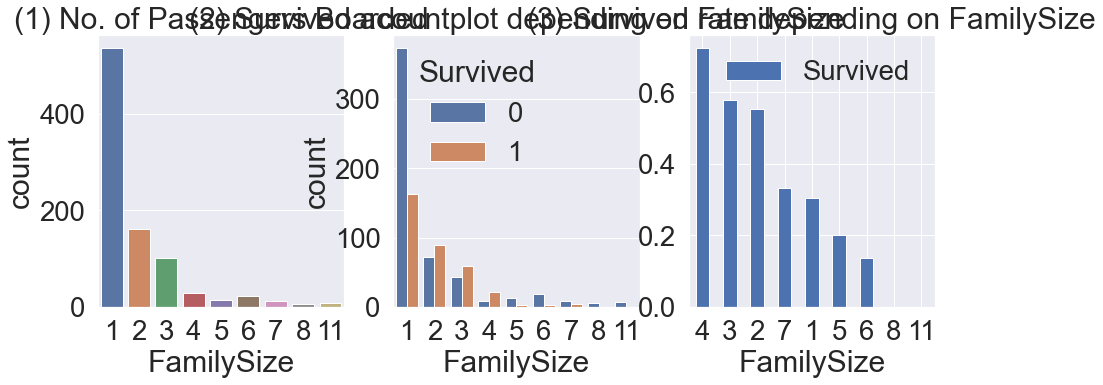

In [165]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived acountplot depending on FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(
    by='Survived', ascending=False).plot.bar(ax=ax[2], rot=0)
ax[2].set_title('(3) Survived rate depending on FamilySize')

## Fare

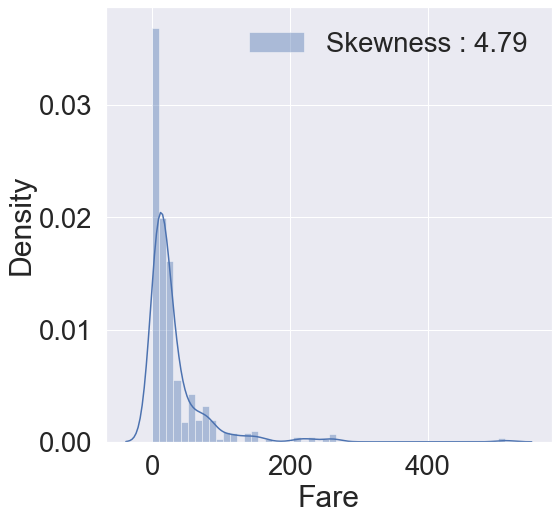

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [167]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

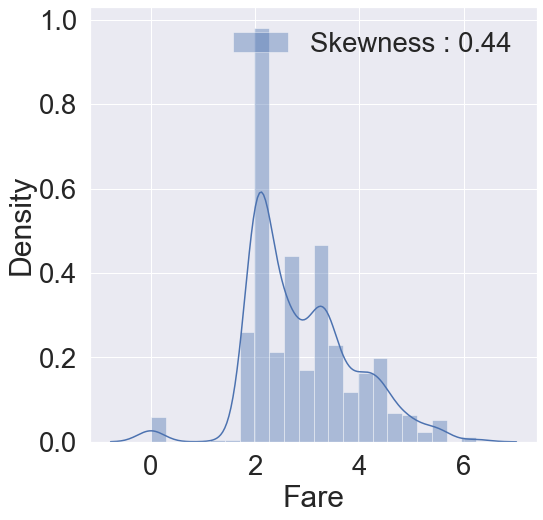

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## Cabin

In [169]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## Ticket

In [170]:
df_train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
3101295              6
                    ..
347078               1
PC 17592             1
330909               1
STON/O 2. 3101273    1
C 7075               1
Name: Ticket, Length: 681, dtype: int64

# Feature Engineering

## Fill Null
### Fill Null in Age using title

In [171]:
# null check
print('Total : {} people'.format(len(df_train)))
df_train.isnull().sum()

Total : 891 people


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [172]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [173]:
df_train[['Initial', 'Sex']].value_counts()

Initial   Sex   
Mr        male      517
Miss      female    182
Mrs       female    125
Master    male       40
Dr        male        6
Rev       male        6
Major     male        2
Col       male        2
Mlle      female      2
Countess  female      1
Don       male        1
Dr        female      1
Sir       male        1
Jonkheer  male        1
Lady      female      1
Mme       female      1
Ms        female      1
Capt      male        1
dtype: int64

In [185]:
df_train['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
     'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr','Mr'], inplace=True)
df_test['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
     'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [186]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.616750,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.887097,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.798677,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.984252,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

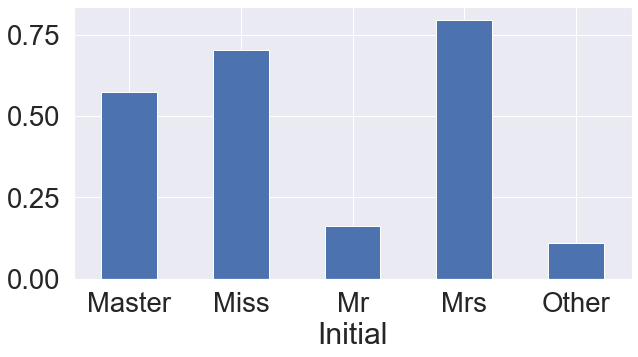

In [187]:
df_train.groupby('Initial')['Survived'].mean().plot.bar(rot=0, figsize=(10,5))

In [188]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.616750,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.887097,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.798677,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.984252,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [189]:
df_train.Age.isnull().sum()

0

In [190]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

In [191]:
df_train.Age.isnull().sum()

0

In [192]:
df_test.Age.isnull().sum()

0

### Fill Null in Embarked

In [193]:
df_train.Embarked.isnull().sum()

2

In [194]:
df_train.Embarked.fillna('S', inplace=True)

In [195]:
df_train.Embarked.isnull().sum()

0

## Change Age (continuous to categorical)

In [196]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [197]:
df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

In [198]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


## Change Initial, Embarked and Sex (string to numerical)

In [199]:
df_train['Initial'] = df_train['Initial'].map(
    {'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map(
    {'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [200]:
df_train['Initial'].head()

0    2
1    3
2    1
3    3
4    2
Name: Initial, dtype: int64

In [201]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [202]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [203]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [204]:
df_train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [205]:
df_train['Embarked'].isnull().sum()

0

In [206]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [207]:
df_train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

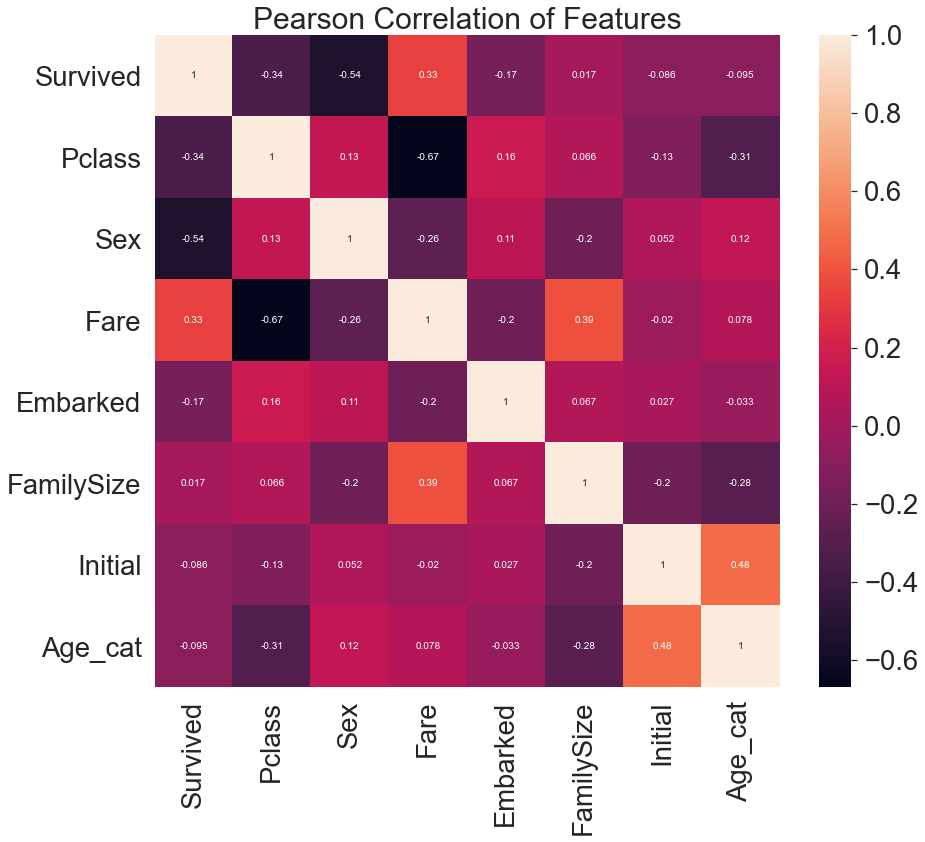

In [208]:
heatmap_data = df_train[['Survived', 'Pclass', 
                         'Sex', 'Fare', 'Embarked', 
                         'FamilySize', 'Initial', 'Age_cat']]
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features')
sns.heatmap(heatmap_data.astype(float).corr(), annot=True)

del heatmap_data

## One-hot encoding on Initial and Embarked

In [209]:
df_train = pd.get_dummies(df_train, 
                          columns=['Initial'], 
                          prefix='Initial')
df_test = pd.get_dummies(df_test,
                        columns=['Initial'], 
                         prefix='Initial')

In [210]:
df_train = pd.get_dummies(df_train, 
                          columns=['Embarked'], 
                          prefix='Embarked')
df_test = pd.get_dummies(df_test, 
                         columns=['Embarked'], 
                         prefix='Embarked')

In [211]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


## Drop columns

In [212]:
df_train.drop(['PassengerId', 'Name', 
               'SibSp', 'Parch', 'Ticket', 'Cabin'], 
              axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 
               'SibSp', 'Parch', 'Ticket', 'Cabin'], 
              axis=1, inplace=True)

In [213]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


# Building machine learning model and prediction using the trained model

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Preparation - Split dataset into train, valid, test set

In [215]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train.Survived.values
X_test = df_test.values

In [216]:
# X_tr: Survived를 제외한 데이터 (70% of X_train)
# X_vld: Survived를 제외한 데이터 (30% of X_train)
# y_tr : Survived vector (70% of target_label)
# y_vld : Survived vector (30% of target_label)
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, 
                                      target_label, 
                                      test_size=0.3, 
                                      random_state=2018)

## Model generation and perdiction

In [217]:
model = RandomForestClassifier()

In [218]:
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld) # prediction == y값 백터!

In [219]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(
    y_vld.shape[0],
    100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


## Feature importance

In [228]:
from pandas import Series

feature_importance = model.feature_importances_
print('Feature importance:', feature_importance)
Series_feat_imp = Series(feature_importance, 
                         index=df_test.columns)
print('Series_feat_imp:', Series_feat_imp)

Feature importance: [0.098603   0.0990026  0.33123577 0.0917654  0.11839853 0.01124411
 0.03722982 0.13098305 0.03155319 0.00469579 0.01291454 0.01293669
 0.01943753]
Series_feat_imp: Pclass        0.098603
Sex           0.099003
Fare          0.331236
FamilySize    0.091765
Age_cat       0.118399
Initial_0     0.011244
Initial_1     0.037230
Initial_2     0.130983
Initial_3     0.031553
Initial_4     0.004696
Embarked_0    0.012915
Embarked_1    0.012937
Embarked_2    0.019438
dtype: float64


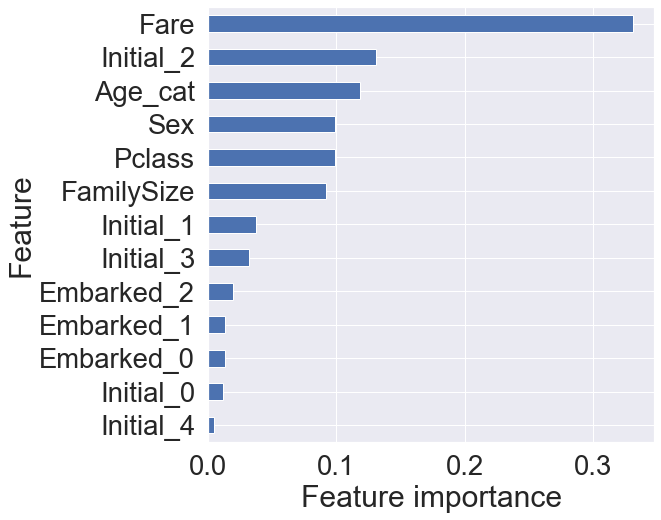

In [221]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## Prediction on Test set

In [222]:
submission = pd.read_csv('./input/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [225]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [224]:
submission.to_csv('./my_second_submission.csv', index=False)